In [1]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

config = {
    'epoch':500,
    'lr': 0.001
}

class Data(object):
    def __init__(self):
        # unsqueeze 一維轉成二維 [1,2,3] -> [[1,2,3]]  (3) -> (3,1)
        self.x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1) 
        self.y = self.x.pow(2) + 0.2*torch.rand(self.x.size())

        self.x , self.y = Variable(self.x) , Variable(self.y)
        
    def get_data(self):
        return self.x , self.y

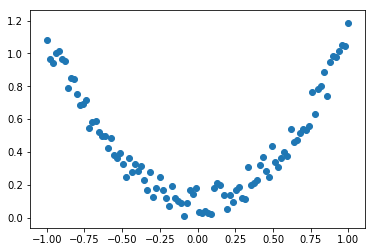

In [2]:
data = Data()

x,y = data.get_data()

plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [3]:
# Create Model

model = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),  # 跟 nn.functional 不一樣 這個是 class
    torch.nn.Linear(10,1)
)

print(model)

Sequential (
  (0): Linear (1 -> 10)
  (1): ReLU ()
  (2): Linear (10 -> 1)
)


In [5]:
optimizer = torch.optim.Adam(model.parameters(),lr=config['lr'])
loss_func = torch.nn.MSELoss()

model.train()

for step in range(config['epoch']):
    out = model(x)
    loss = loss_func(out,y)
    
    if step%50 == 0:
        print("Epoch[{}/{}] loss:{}".format(step,config['epoch'],loss.data.numpy()))
    
    optimizer.zero_grad() # 初始梯度，上一次保留的梯度刪除
    loss.backward()
    optimizer.step() # 優化


Epoch[0/500] loss:[0.11276295]
Epoch[50/500] loss:[0.07725338]
Epoch[100/500] loss:[0.06628233]
Epoch[150/500] loss:[0.05526161]
Epoch[200/500] loss:[0.04488476]
Epoch[250/500] loss:[0.03559927]
Epoch[300/500] loss:[0.02654026]
Epoch[350/500] loss:[0.01835468]
Epoch[400/500] loss:[0.01304652]
Epoch[450/500] loss:[0.0098688]


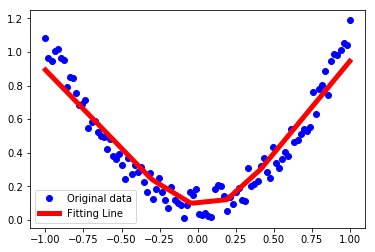

In [7]:
model.eval() # evaluation model

predict = model(x)
predict = predict.data.numpy()

plt.plot(x.data.numpy(), y.data.numpy(), 'bo', label='Original data')
plt.plot(x.data.numpy(), predict, color='red',linewidth=5,label='Fitting Line')
plt.legend() 
plt.show()